In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import os
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import pickle

## UCI datasets
Check: <https://archive.ics.uci.edu/ml/datasets.html?sort=nameUp&view=list>

Many of these are far too old... but some are hierarchical. Consider the following which are potentially hierarchical variable, but also pretty old.
**Cervical Cancer diagnosis**: <https://archive.ics.uci.edu/ml/datasets/Cervical+cancer+%28Risk+Factors%29>
**Car Evaluation Model**: <https://archive.ics.uci.edu/ml/datasets/Car+Evaluation>
**Nursery**: <https://archive.ics.uci.edu/ml/datasets/Nursery>

## PGM based

A promising one was <http://science.sciencemag.org/content/sci/353/6301/790.full.pdf>. But the ML part of it is that it uses a conv net on satellite imagery...

## Medical data
Scroll down to 3: EHR data - <https://github.com/beamandrew/medical-data>
Unfortunately, its not easy to get started on these.

## KDD datasets survey (circa 2000)
Refer to <http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.445.4559&rep=rep1&type=pdf>

## El Nino Dataset (Promising, but have to do autoregression and cluster the buoys manually)
Reference: <https://archive.ics.uci.edu/ml/datasets/El+Nino>
tao_all2.missing must be per observation, starting at latitude/longitude.

Unfortunately, no labels are available - its more of a time series evolution kinda task

## Datasets continue after these few code blocks

In [40]:
base_dir = "data/elnino/"
elnino_file = "elnino"
with open(os.path.join(base_dir, "elnino.col")) as f:
    elnino_cols = [line.strip() for line in f]

elnino_df = pd.read_csv(os.path.join(base_dir, elnino_file), delim_whitespace=True, header=None)
elnino_df.columns = elnino_cols
print("Columns: {}".format(elnino_cols))

Columns: ['buoy', 'day', 'latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.', 's.s.temp.']


In [39]:
with open(os.path.join(base_dir, "tao-all2.col")) as f:
    tao_cols = [line.strip() for line in f]

tao_file = "tao-all2.dat"
tao_df = pd.read_csv(os.path.join(base_dir, tao_file), delim_whitespace=True, header=None)
tao_df.columns = tao_cols
print("Columns: {}".format(tao_cols))

Columns: ['obs', 'year', 'month', 'day', 'date', 'latitude', 'longitude', 'zon.winds', 'mer.winds', 'humidity', 'air temp.', 's.s.temp.']


In [32]:
tao_missing_file = "tao-all2.missing"
tao_missing_df = pd.read_csv(os.path.join(base_dir, tao_missing_file), delim_whitespace=True, header=None)

In [38]:
print(tao_df.shape, tao_missing_df.shape)

(178080, 12) (178080, 8)


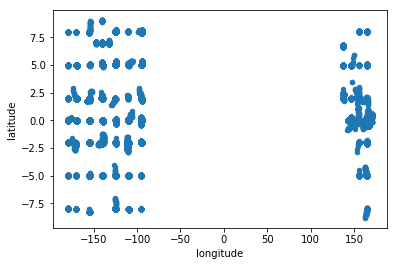

In [45]:
tao_df.plot.scatter('longitude', 'latitude')

## Google Flu Trends
> Obtain from <https://www.google.org/flutrends/about/>

Estimate of influenza per week per country.
Standard Task: Global estimation
Alternative task: Prediction for a country?

Suitable input data, unclear what the output should be. A baseline could be Vector Autoregression.

Con: Google Flu trend was bashed at one point for being inconsistent

## GHO
Essentially the same as Google Flu Trends, but for a lot more diseases.

## Geo-Spatial Dataset: Wind
Check corresponding section in <https://arxiv.org/pdf/1804.08562.pdf>. Currently unavailable due to government shutdown

# undesirable? - gridded data
## Precipitation data:
Obtained from <https://iridl.ldeo.columbia.edu/> by referring to <http://proceedings.mlr.press/v80/osama18a/osama18a.pdf>. Not too clear how to get it either.

## Geo-Spatial Dataset: Pacific Sea Temperature
Gridded sea temperatures. Check corresponding section in <https://arxiv.org/pdf/1804.08562.pdf>. Not suitable since there isn't a single output to predict. (Unless we want to use upsampling-FGL). Also appears in <http://proceedings.mlr.press/v80/osama18a/osama18a.pdf>

## Car Traffic Forecasting
Not gridded but the rest is ditto as above. Also not clear how to get the Beijing dataset... Its probably here <https://onedrive.live.com/?authkey=%21ADgmvTgfqs4hn4Q&cid=CF159105855090C5&id=CF159105855090C5%2141466&parId=CF159105855090C5%211438&action=defaultclick>

## Spatio-Temporal datasets
Information from: <http://faculty.missouri.edu/~wiklec/datasets.html>
**Eurasian Collared Dove Breeding Bird Survey Data**: Too small.
**Tropical Pacific Sea Surface Temperature**: Gridded, but also pretty small. Similar to the Pacific Sea Temperature dataset from a little earlier.
**Gridded Tornado Report Data**: 1836 locations, but only 49 values per location.

## Market trend prediction
Couldn't find any recent papers at ML conferences or sizable datasets.